In [1]:
#https://blog.keras.io/building-autoencoders-in-keras.html

In [2]:
from __future__ import division, print_function
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Activation, Reshape, UpSampling2D
from IPython.display import SVG
import matplotlib.pyplot as plt
from keras.utils.vis_utils import model_to_dot
from keras import backend as K
from keras.applications import vgg16
from keras.layers import Input, merge
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Dense, Dropout, Flatten, Lambda
from keras.models import Sequential, Model
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise
from random import shuffle
from scipy.misc import imresize
import itertools
from keras.callbacks import EarlyStopping, TensorBoard
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import pairwise
from keras import optimizers
import os
from PIL import Image
from numpy import dot
from numpy.linalg import norm
import glob    
import pandas as pd
%matplotlib inline
import pickle
import cv2

Using TensorFlow backend.


In [3]:
seenTr=pd.read_csv('dataset_unseen_training_siamese.csv')
seenVal=pd.read_csv('dataset_unseen_validation_siamese.csv')
data_seen_dir = ("D:/ML/unseen-dataset/")
images_seen_traning_dir = os.path.join(data_seen_dir, "TrainingSet/")
print(images_seen_traning_dir)
images_seen_validation_dir = os.path.join(data_seen_dir, "ValidationSet/")
print(images_seen_validation_dir)

D:/ML/unseen-dataset/TrainingSet/
D:/ML/unseen-dataset/ValidationSet/


In [4]:
# this is the size of our encoded representations
encoding_dim = 64  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(4096,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(4096, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
encoder = Model(input_img, encoded)

In [6]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [7]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [8]:
def datagen(path):
    image_list = []
    file=[]
    for filename in glob.glob(path+'/*.png'): #assuming gif
        im=cv2.imread(filename,0)
        image_list.append(im)
        x = filename.split('\\')        
        file.append(x[-1])
    return image_list,file

In [9]:
training_image, training_img_name = datagen(images_seen_traning_dir)
training_image = np.asarray(training_image)
x_train = training_image
validation_image, validation_img_name = datagen(images_seen_validation_dir)
validation_image = np.asarray(validation_image)
x_test = validation_image

In [10]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
pval=0.97
print (x_train.shape)
print (x_test.shape)

(12906, 4096)
(888, 4096)


In [11]:
history=autoencoder.fit(x_train, x_train,
                epochs=500,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Instructions for updating:
Use tf.cast instead.
Train on 12906 samples, validate on 888 samples
Epoch 1/500
12906/12906 [==============================] - 5s 385us/step - loss: 0.3240 - val_loss: 0.1584
Epoch 2/500
12906/12906 [==============================] - 4s 338us/step - loss: 0.1755 - val_loss: 0.1574
Epoch 3/500
12906/12906 [==============================] - 5s 352us/step - loss: 0.1749 - val_loss: 0.1567
Epoch 4/500
12906/12906 [==============================] - 4s 347us/step - loss: 0.1747 - val_loss: 0.1567
Epoch 5/500
12906/12906 [==============================] - 4s 343us/step - loss: 0.1746 - val_loss: 0.1563
Epoch 6/500
12906/12906 [==============================] - 4s 344us/step - loss: 0.1745 - val_loss: 0.1563
Epoch 7/500
12906/12906 [==============================] - 4s 345us/step - loss: 0.1745 - val_loss: 0.1565
Epoch 8/500
12906/12906 [==============================] - 5s 353us/step - loss: 0.1744 - val_loss: 0.1567
Epoch 9/500
12906/12906 [=======================

Epoch 74/500
12906/12906 [==============================] - 4s 343us/step - loss: 0.1554 - val_loss: 0.1395
Epoch 75/500
12906/12906 [==============================] - 4s 336us/step - loss: 0.1552 - val_loss: 0.1395
Epoch 76/500
12906/12906 [==============================] - 4s 336us/step - loss: 0.1550 - val_loss: 0.1393
Epoch 77/500
12906/12906 [==============================] - 4s 335us/step - loss: 0.1547 - val_loss: 0.1391
Epoch 78/500
12906/12906 [==============================] - 5s 350us/step - loss: 0.1545 - val_loss: 0.1389
Epoch 79/500
12906/12906 [==============================] - 5s 359us/step - loss: 0.1543 - val_loss: 0.1387
Epoch 80/500
12906/12906 [==============================] - 5s 360us/step - loss: 0.1541 - val_loss: 0.1386
Epoch 81/500
12906/12906 [==============================] - 5s 353us/step - loss: 0.1539 - val_loss: 0.1383
Epoch 82/500
12906/12906 [==============================] - 5s 355us/step - loss: 0.1537 - val_loss: 0.1382
Epoch 83/500
12906/12906 [==

12906/12906 [==============================] - 4s 348us/step - loss: 0.1334 - val_loss: 0.1212
Epoch 225/500
12906/12906 [==============================] - 4s 340us/step - loss: 0.1333 - val_loss: 0.1211
Epoch 226/500
12906/12906 [==============================] - 4s 341us/step - loss: 0.1332 - val_loss: 0.1210
Epoch 227/500
12906/12906 [==============================] - 5s 350us/step - loss: 0.1331 - val_loss: 0.1209
Epoch 228/500
12906/12906 [==============================] - 5s 375us/step - loss: 0.1330 - val_loss: 0.1209
Epoch 229/500
12906/12906 [==============================] - 4s 342us/step - loss: 0.1329 - val_loss: 0.1208
Epoch 230/500
12906/12906 [==============================] - 4s 341us/step - loss: 0.1328 - val_loss: 0.1207
Epoch 231/500
12906/12906 [==============================] - 4s 345us/step - loss: 0.1327 - val_loss: 0.1206
Epoch 232/500
12906/12906 [==============================] - 4s 339us/step - loss: 0.1326 - val_loss: 0.1205
Epoch 233/500
12906/12906 [======

12906/12906 [==============================] - 3s 201us/step - loss: 0.1215 - val_loss: 0.1112
Epoch 375/500
12906/12906 [==============================] - 3s 200us/step - loss: 0.1215 - val_loss: 0.1112
Epoch 376/500
12906/12906 [==============================] - 3s 203us/step - loss: 0.1214 - val_loss: 0.1111
Epoch 377/500
12906/12906 [==============================] - 3s 200us/step - loss: 0.1213 - val_loss: 0.1111
Epoch 378/500
12906/12906 [==============================] - 3s 199us/step - loss: 0.1213 - val_loss: 0.1110
Epoch 379/500
12906/12906 [==============================] - 3s 198us/step - loss: 0.1212 - val_loss: 0.1110
Epoch 380/500
12906/12906 [==============================] - 3s 199us/step - loss: 0.1212 - val_loss: 0.1110
Epoch 381/500
12906/12906 [==============================] - 3s 200us/step - loss: 0.1211 - val_loss: 0.1109
Epoch 382/500
12906/12906 [==============================] - 3s 198us/step - loss: 0.1211 - val_loss: 0.1108
Epoch 383/500
12906/12906 [======

In [12]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B459519518>,
      dtype=object)

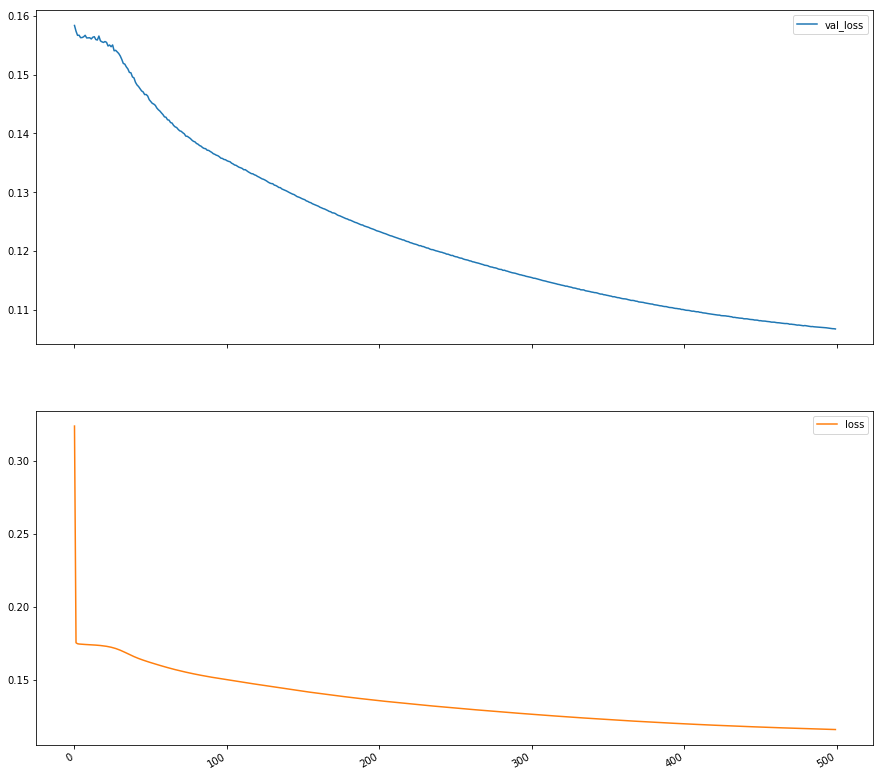

In [13]:
df_hist = pd.DataFrame(history.history)
df_hist.plot(subplots=True, figsize=(15,15))

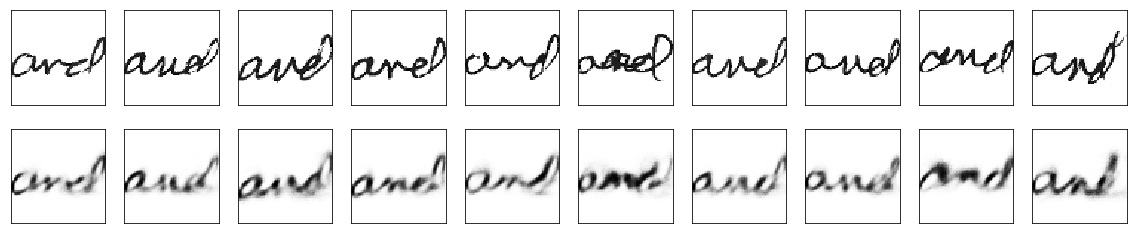

In [14]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [15]:
def cos_sim(a, b):
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return (dot_product / (norm_a * norm_b))

In [32]:
#print(training_img_name)
df = pd.read_csv('dataset_unseen_validation_siamese.csv')
orgLabels=df.iloc[:,3:4].values.tolist()
target=[]
for i in range(0,len(orgLabels)):
    target.append(orgLabels[i][0])
#print(target)
left_name = df.iloc[:,1:2].values.tolist()
right_name = df.iloc[:,2:3].values.tolist()
final = list(zip(left_name, right_name))
predict=[]
target_final = []

labelsNew=[]
for i in range(0,len(final)):
    i1,i2 = final[i]
    #print(type(i1))
    #print(i1,i2)
    x=''.join(i1)
    y=''.join(i2)
    if(x[:4]==y[:4]):
        target_final.append(1)
    else:
        target_final.append(0)
    #if((''.join(i1)) in training_img_name and (''.join(i2)) in training_img_name):
    idx_i1 = validation_img_name.index(''.join(i1))
    idx_i2 = validation_img_name.index(''.join(i2))
    #print(idx_i1)
    th=cos_sim(encoded_imgs[idx_i1],encoded_imgs[idx_i2])

    #print(th)

    if(th>pval):
        predict.append(1)
    else:
        predict.append(0)

In [33]:
c=0
#print(predict)
for i in range(0,len(final)):
    if(predict[i]==target[i]):
        c+=1
print("Accuracy is {}".format(c/len(final)))

Accuracy is 0.6819261213720317
